### Convert trained model from .bin to .pth
Converted weights can then be used in Automatic1111 be copying them into the `/extensions/sd-webui-controlnet/models` folder.

In [2]:
cn_base_path = "C:\\Users\\viscom\\workspace\\tree_project\\Training_Output\\model_out"
""" base path dir structure:
    - pytorch_model.bin
    - config.json
"""

' base path dir structure:\n    - pytorch_model.bin\n    - config.json\n'

In [ ]:
from diffusers import ControlNetModel
import torch
import os


out_path = os.path.join(cn_base_path, "control_own_sd15_tree.pth")
model = ControlNetModel.from_pretrained(cn_base_path, torch_dtype=torch.float16)
model.eval()

torch.save(model.state_dict(), out_path)

### Model Inference
https://github.com/huggingface/diffusers/blob/main/examples/controlnet/README.md#performing-inference-with-the-trained-controlnet

text_encoder\model.safetensors not found
100%|██████████| 20/20 [00:45<00:00,  2.30s/it]


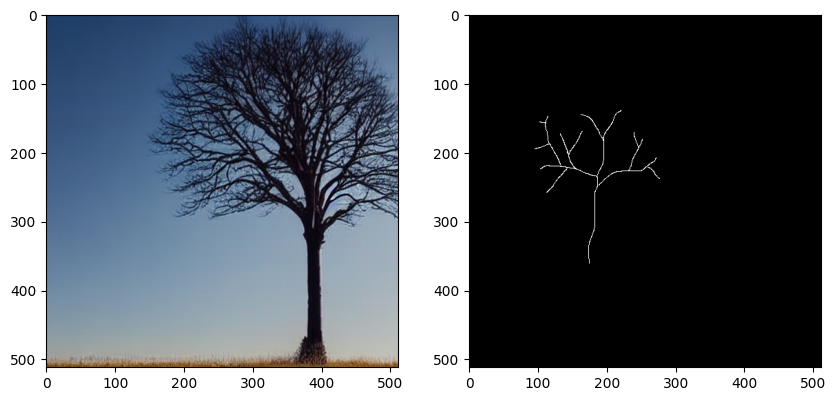

In [10]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch
import matplotlib.pyplot as plt
import os

sd_model_path = "runwayml/stable-diffusion-v1-5"

controlnet = ControlNetModel.from_pretrained(cn_base_path, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    sd_model_path, controlnet=controlnet, torch_dtype=torch.float16
)

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# remove following line if xformers is not installed or when using Torch 2.0.
# pipe.enable_xformers_memory_efficient_attention()
# memory optimization.
pipe.enable_model_cpu_offload()

control_image = load_image("../Training/val_image_1.png")
prompt = "a lone tree in the middle of a field"

# generate image
generator = torch.manual_seed(0)
image = pipe(
    prompt, num_inference_steps=20, generator=generator, image=control_image
).images[0]
# save generated image with ascending index
index = len(os.listdir("./out_images"))
image.save(f"./out_images/output{index}.png")

# show generated image and control image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[1].imshow(control_image)
plt.show()